In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import gc
import os
import tikzplotlib


In [2]:
# filename = "20191020_190347__Contextual_linear_PAR_linear_results.pickle"
# filename = "20191020_145612__Contextual_linear_PAR_linear_results.pickle"
# filename = "20191021_033515__Contextual_linear_PAR_linear_results.pickle"
# filename = "20191021_163926__Contextual_linear_PAR_linear_results.pickle"
filename = '20191023_001453__Contextual_linear_PAR_linear_results.pickle'
filename = '20191031_052921__Contextual_linear_PAR_linear_results.pickle'
filename = '20191031_104517__Contextual_linear_PAR_linear_results.pickle'
filename = '20191103_131934__Contextual_linear_PAR_linear_results.pickle'
filename = '20191104_031438__Contextual_linear_PAR_linear_results.pickle' #sparse attacks with norm 10 -10 100 -100
# filename = '20191101_213158__Contextual_linear_PAR_linear_results.pickle'
filename = '20200113_092353__Contextual_linear_PAR_linear_results.pickle'
filename = '20200113_133036__Contextual_linear_PAR_linear_results.pickle'
filename = '20200114_052433__Contextual_linear_PAR_linear_results.pickle' # jester 500k with 500 sim
filename = 'jester_20200114_063331__Contextual_linear_PAR_linear_results.pickle'
filename = 'jester_20200114_124337__Contextual_linear_PAR_linear_results.pickle'# jester results in paper 1
filename = 'movilens_20200114_210109__Contextual_linear_PAR_linear_results.pickle'
filename = 'jester_20200115_115820__Contextual_linear_PAR_linear_results.pickle'
# filename = 'movilens_20200115_201632__Contextual_linear_PAR_linear_results.pickle'
with open(filename, 'rb') as f:
    results = pickle.load(f)
    
frequency = 1000

In [3]:
nb_sim = len(results[0])
nb_iter = len(results[0][0][0]['regret'])

In [4]:
len(results)

1

df = pd.DataFrame(results[0][0])
groupby = 'method'
df[groupby] = 'attack frequency:' + df.attack_frequency.astype(str)\
+ '_xi:' + df.xi.astype(str)\
+ '_weak_attack:' + df.weak_attack.astype(str)
sns.lineplot(data=df, x='iteration', y='cumulative_regret', hue=groupby)

In [5]:
# %%time
# dataframes = []
# for i, result in enumerate(results):
#     dataframes.append([])
#     for res in result:
#         df = pd.DataFrame(res[0])
#         df['cum_regret'] = df['regret'].cumsum()
#         df['iteration'] = range(nb_iter)
#         df = df[df.iteration % frequency == 0]
#         dataframes[i].append(df)

dataframes = [[pd.DataFrame(res[0]) for res in result] for result in results]

# for dataframes_list in dataframes:
#     for df in dataframes_list:
#         df['cum_regret'] = df['regret'].cumsum()
#         df['iteration'] = range(nb_iter)
#         df = df[df.iteration % frequency == 0]
#         gc.collect()

del results
gc.collect()

7

In [6]:
results_df = [pd.concat(df) for df in dataframes]

for df in results_df:
    df['iteration'] = np.concatenate([range(nb_iter)for _ in range(nb_sim)])
    df = df[df.iteration % 100 == 0]
gc.collect()

In [7]:
all_results_df = pd.concat(results_df).reset_index(drop=True)

In [8]:
all_results_df.reset_index(drop=True)
gc.collect()

40

In [9]:
images_folder = 'images'
def plot_results(df, y, hue, hue_order=None, frequency=frequency, offset=0, figure_size=(14,10), ylim=None, ci=95,title=None):
    fig, ax = pyplot.subplots(figsize=figure_size)
    if ylim:
        ax.set_ylim(ylim)
    
    sns.lineplot(data=df[df.iteration % frequency == offset], x='iteration', y=y, hue=hue, hue_order=hue_order, ci=ci)
    if title is not None:
        fig.savefig(os.path.join(images_folder, title))
        tikzplotlib.save(os.path.join(images_folder, title)+'.tex')


In [10]:
groupby = 'algorithm'
# all_results_df[groupby] = 'attack frequency:' + all_results_df.attack_frequency.astype(str)\
# + '_xi:' + all_results_df.xi.astype(str)\
# + '_weak_attack:' + all_results_df.weak_attack.astype(str)\
# + '_method:' + all_results_df.method.astype(str)

all_results_df[groupby] = 'attack frequency:' + all_results_df.attack_frequency.astype(str)\
+ '_sparse_attacks:' + all_results_df.sparse_attacks.astype(str)

all_results_df[groupby] = all_results_df.attack_frequency.apply(lambda x: 'LinUCB' if x ==0.0 else ('LinUCB all contexts' if x ==1.0 else 'LinUCB 20% attacked'))


df_weak_attacks = all_results_df[(all_results_df.weak_attack) | (all_results_df.attack_frequency == 0)]

In [11]:
all_results_df[all_results_df.attack_frequency == 1.0].sum_attacks_norms

0        1.964174e+02
1        2.030009e+05
2        3.130986e+05
3        3.576545e+05
4        3.946071e+05
             ...     
74995    2.467538e+06
74996    2.467538e+06
74997    2.467538e+06
74998    2.467538e+06
74999    2.467894e+06
Name: sum_attacks_norms, Length: 75000, dtype: float64

In [12]:
all_results_df.attacks.describe()

count    225000.000000
mean          0.333115
std          16.134763
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2067.441707
Name: attacks, dtype: float64

In [13]:
all_results_df[all_results_df.attack_frequency==1.0]

,iteration,regret,cumulative_regret,rewards,norm_errors,attacks,relative_attack_norm,decrease_epsilon,successful_attack,xi,attack_frequency,sum_attacks_norms,weak_attack,method,sparse_attacks,nb_attacks,n_successful_attack,n_failed_attack,design_mat_worse_ratio,algorithm
0,0,0.207957,2.079572e-01,[0.573058032137937],3.350258,196.417409,7.501878,True,0.000000,0.0001,1.0,1.964174e+02,False,None,2.0,1,0,1,1.000000,LinUCB all contexts
1,1000,0.297500,1.943760e+02,[0.46338989341516434],3.317813,169.766941,7.248417,True,0.022977,0.0001,1.0,2.030009e+05,False,None,2.0,978,23,978,16.071991,LinUCB all contexts
2,2000,0.402997,4.446464e+02,[0.3480039138238575],2.874589,0.000000,1.000000,True,0.252374,0.0001,1.0,3.130986e+05,False,None,2.0,1496,505,1496,28.577642,LinUCB all contexts
3,3000,0.412513,7.198766e+02,[0.25088764485896287],2.873973,0.000000,1.000000,True,0.440853,0.0001,1.0,3.576545e+05,False,None,2.0,1678,1323,1678,27.658047,LinUCB all contexts
4,4000,0.249635,9.939373e+02,[0.5144673668117996],2.874022,0.000000,1.000000,True,0.543614,0.0001,1.0,3.946071e+05,False,None,2.0,1826,2175,1826,28.808019,LinUCB all contexts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,4995000,0.456896,1.657799e+06,[0.2990836544952145],2.873814,0.000000,1.000000,True,0.998251,0.0001,1.0,2.467538e+06,False,None,2.0,8737,4986264,8737,29.072300,LinUCB all contexts
74996,4996000,0.584993,1.658135e+06,[0.23906344379966657],2.873814,0.000000,1.000000,True,0.998251,0.0001,1.0,2.467538e+06,False,None,2.0,8737,4987264,8737,29.072300,LinUCB all contexts
74997,4997000,0.189433,1.658471e+06,[0.5999867223715147],2.873814,0.000000,1.000000,True,0.998252,0.0001,1.0,2.467538e+06,False,None,2.0,8737,4988264,8737,29.072300,LinUCB all contexts
74998,4998000,0.321649,1.658794e+06,[0.4390605449716681],2.873814,0.000000,1.000000,True,0.998252,0.0001,1.0,2.467538e+06,False,None,2.0,8737,4989264,8737,29.072300,LinUCB all contexts


In [14]:
all_results_df

,iteration,regret,cumulative_regret,rewards,norm_errors,attacks,relative_attack_norm,decrease_epsilon,successful_attack,xi,attack_frequency,sum_attacks_norms,weak_attack,method,sparse_attacks,nb_attacks,n_successful_attack,n_failed_attack,design_mat_worse_ratio,algorithm
0,0,0.207957,2.079572e-01,[0.573058032137937],3.350258,196.417409,7.501878,True,0.000000,0.0001,1.0,1.964174e+02,False,None,2.0,1,0,1,1.000000,LinUCB all contexts
1,1000,0.297500,1.943760e+02,[0.46338989341516434],3.317813,169.766941,7.248417,True,0.022977,0.0001,1.0,2.030009e+05,False,None,2.0,978,23,978,16.071991,LinUCB all contexts
2,2000,0.402997,4.446464e+02,[0.3480039138238575],2.874589,0.000000,1.000000,True,0.252374,0.0001,1.0,3.130986e+05,False,None,2.0,1496,505,1496,28.577642,LinUCB all contexts
3,3000,0.412513,7.198766e+02,[0.25088764485896287],2.873973,0.000000,1.000000,True,0.440853,0.0001,1.0,3.576545e+05,False,None,2.0,1678,1323,1678,27.658047,LinUCB all contexts
4,4000,0.249635,9.939373e+02,[0.5144673668117996],2.874022,0.000000,1.000000,True,0.543614,0.0001,1.0,3.946071e+05,False,None,2.0,1826,2175,1826,28.808019,LinUCB all contexts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,4995000,0.579710,1.660471e+06,[0.2400957887272226],3.211701,0.000000,1.000000,True,0.998320,0.0001,0.2,2.202668e+06,False,quadprog,10.0,1677,996575,1677,26.214959,LinUCB 20% attacked
224996,4996000,0.257883,1.660803e+06,[0.5260696184459567],3.211701,0.000000,1.000000,True,0.998320,0.0001,0.2,2.202668e+06,False,quadprog,10.0,1677,996772,1677,26.214959,LinUCB 20% attacked
224997,4997000,0.286726,1.661136e+06,[0.5033146595585574],3.211701,0.000000,1.000000,True,0.998321,0.0001,0.2,2.202668e+06,False,quadprog,10.0,1677,996978,1677,26.214959,LinUCB 20% attacked
224998,4998000,0.571624,1.661471e+06,[0.2298132240458579],3.211701,0.000000,1.000000,True,0.998321,0.0001,0.2,2.202668e+06,False,quadprog,10.0,1677,997171,1677,26.214959,LinUCB 20% attacked


In [15]:
all_results_df = all_results_df[all_results_df.sparse_attacks !=1.0]

In [16]:
all_results_df[all_results_df.attack_frequency == 1.0].attacks.mean()

0.5748924640927688

In [17]:
title_prefix = 'jester_not_all_context'

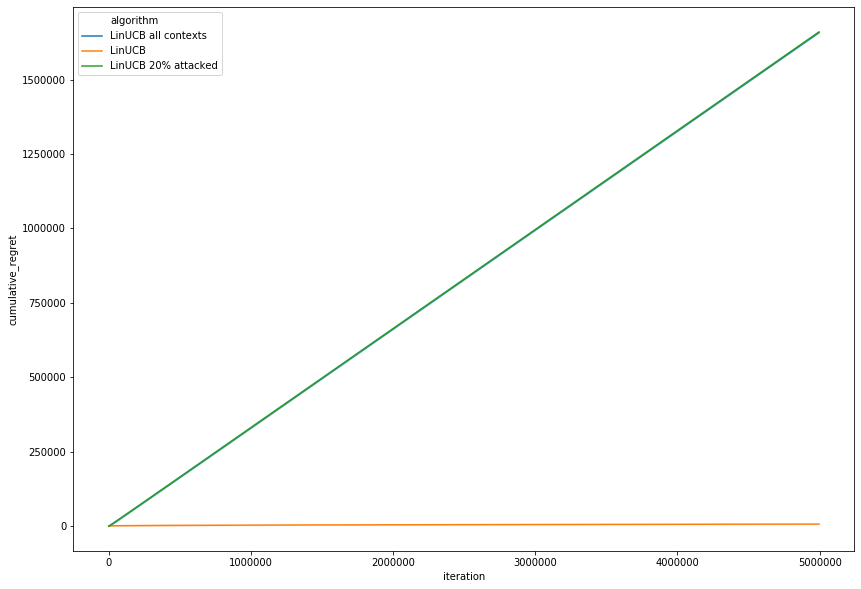

In [18]:
plot_results(all_results_df, y='cumulative_regret', hue=groupby, frequency=5000, title = f'regret_{title_prefix}')
             

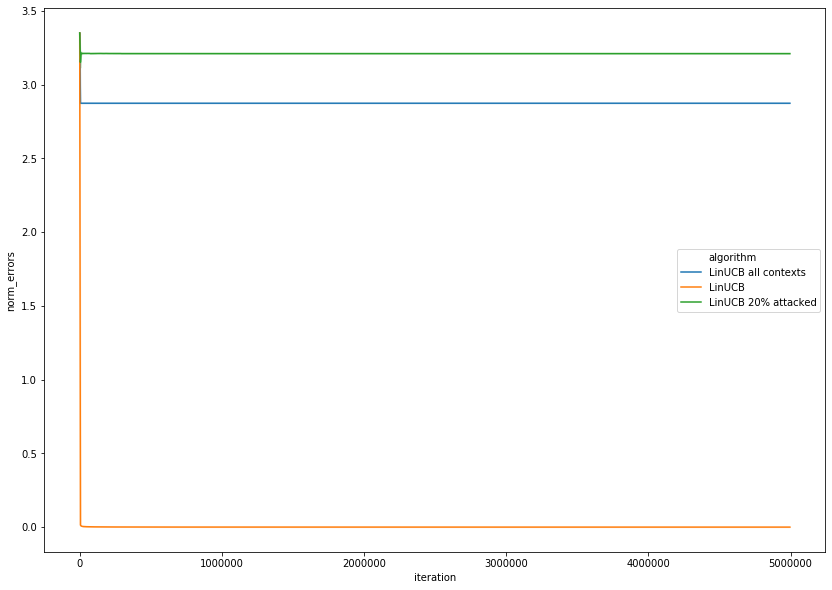

In [19]:
plot_results(all_results_df, y='norm_errors', hue=groupby, frequency=5000, title=f'norm_error_{title_prefix}')

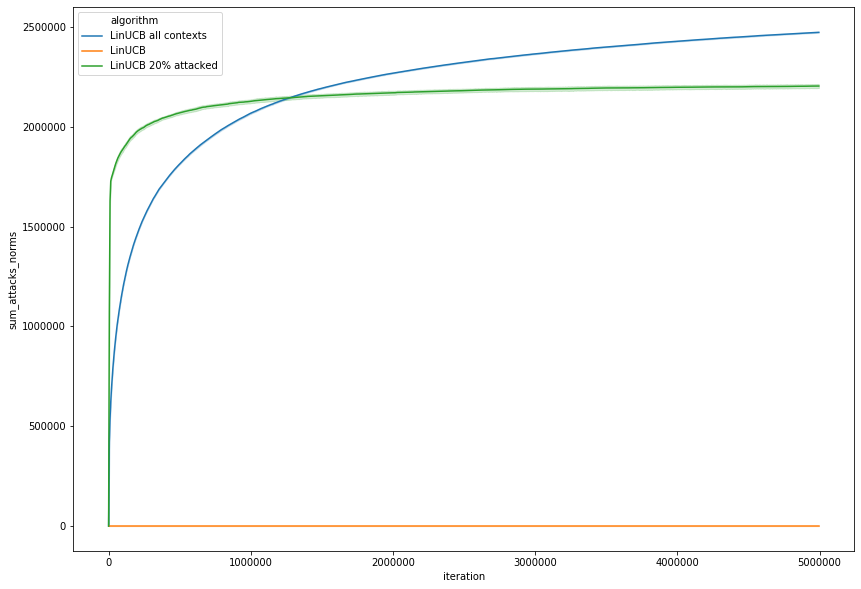

In [20]:
plot_results(all_results_df, y='sum_attacks_norms', hue=groupby, frequency=5000, title=f'attacks_norms_{title_prefix}')

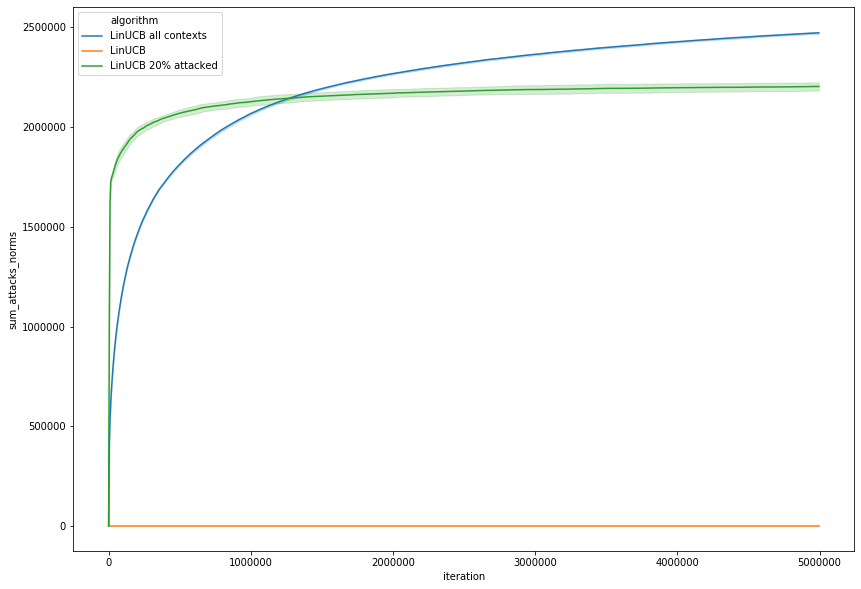

In [21]:
plot_results(all_results_df, y='sum_attacks_norms', hue=groupby, frequency=5000, ci='sd')

In [18]:
all_results_df['ratio_successful_attacks'] = all_results_df['successful_attack']

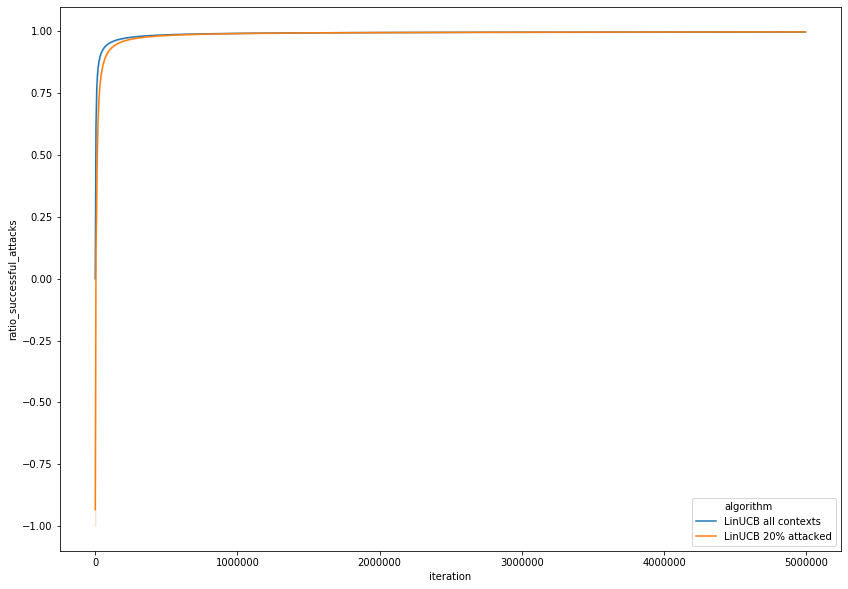

In [19]:
plot_results(all_results_df[all_results_df.attack_frequency > 0], y='ratio_successful_attacks', hue=groupby, frequency=5000, title=f'ratio_success_{title_prefix}')

import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


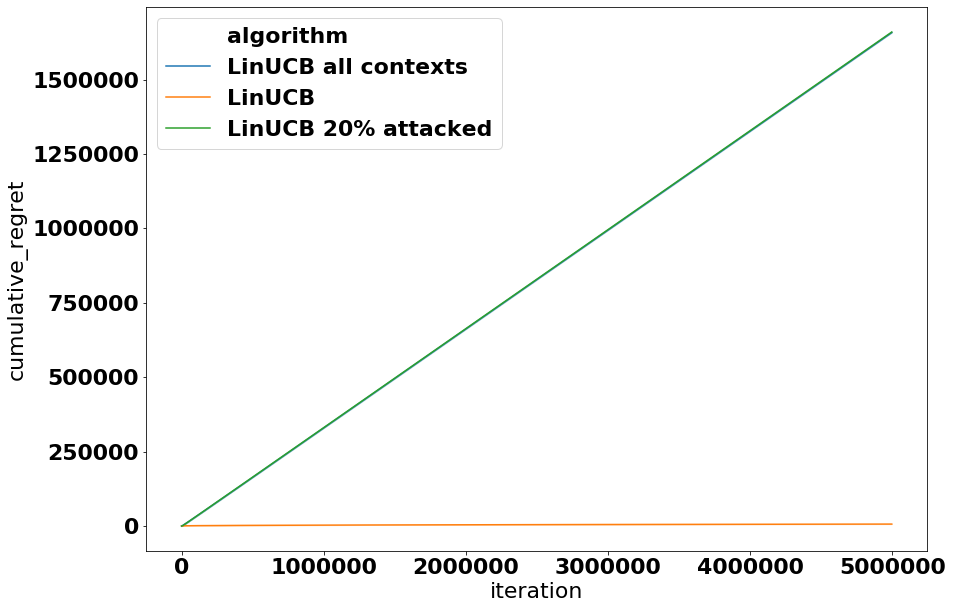

In [53]:
plot_results(all_results_df, y='cumulative_regret', hue=groupby, frequency=5000, ci='sd')
             

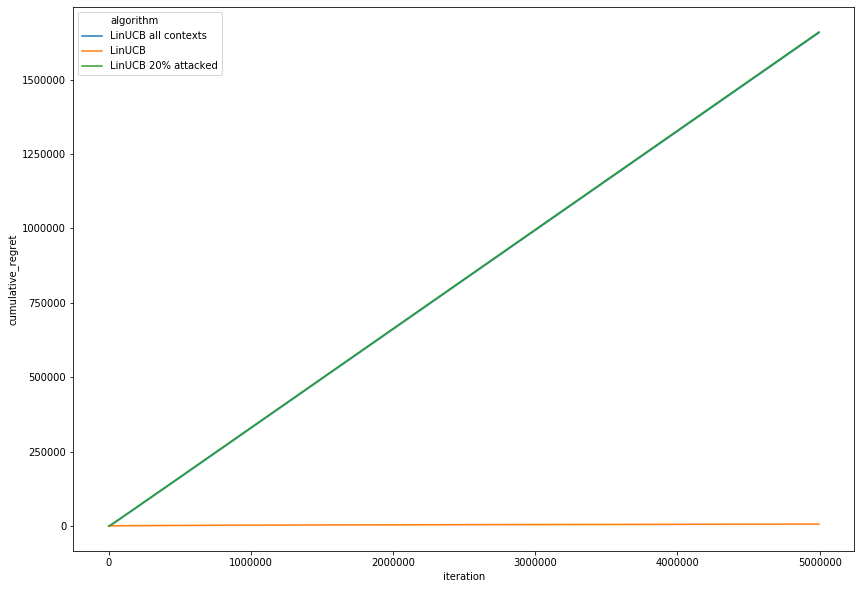

In [44]:
plot_results(all_results_df, y='cumulative_regret', hue=groupby, frequency=5000, title = f'regret_{title_prefix}')
             

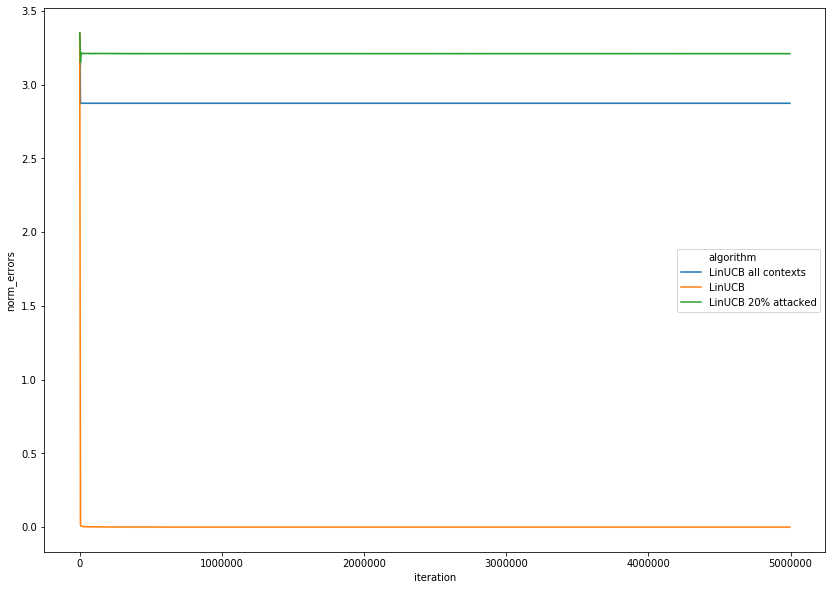

In [45]:
plot_results(all_results_df, y='norm_errors', hue=groupby, frequency=5000, title=f'norm_error_{title_prefix}')

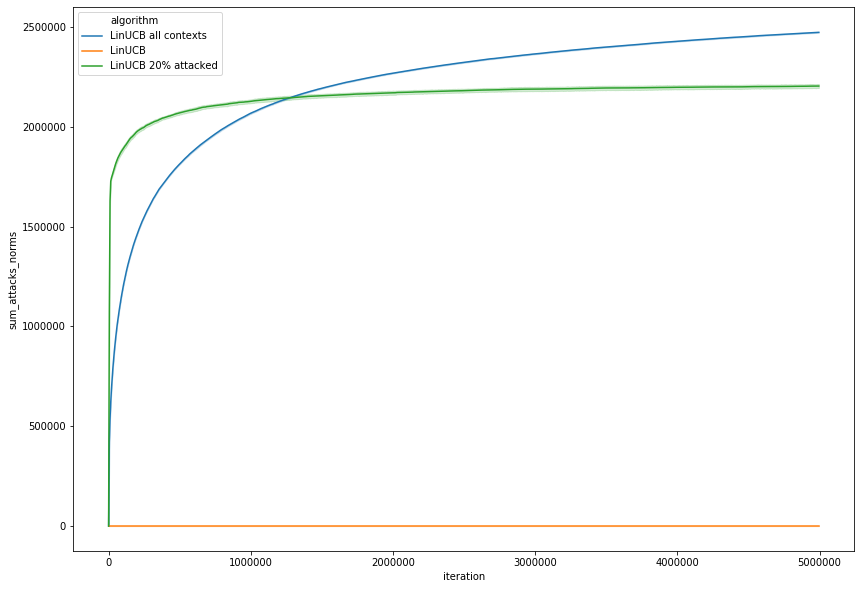

In [46]:
plot_results(all_results_df, y='sum_attacks_norms', hue=groupby, frequency=5000, title=f'attacks_norms_{title_prefix}')

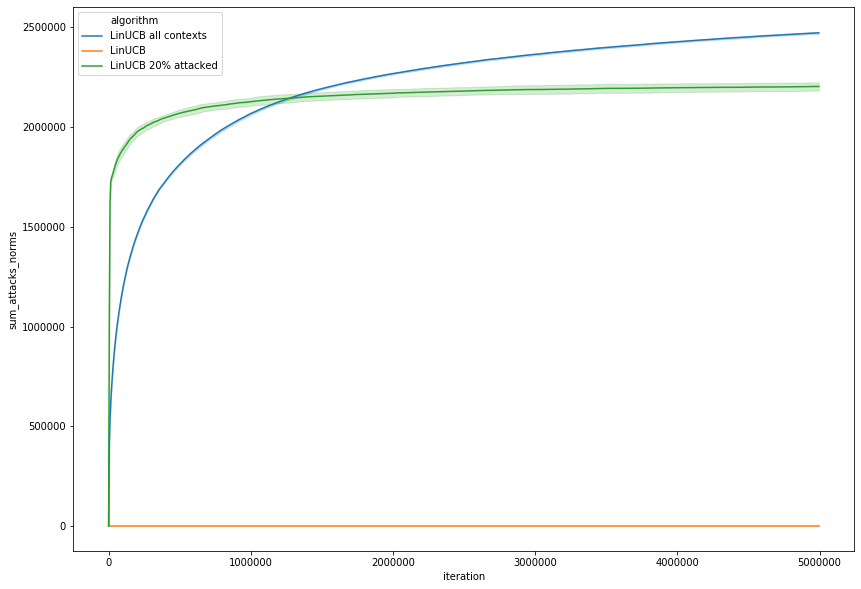

In [47]:
plot_results(all_results_df, y='sum_attacks_norms', hue=groupby, frequency=5000, ci='sd')

In [48]:
all_results_df['ratio_successful_attacks'] = all_results_df['successful_attack']

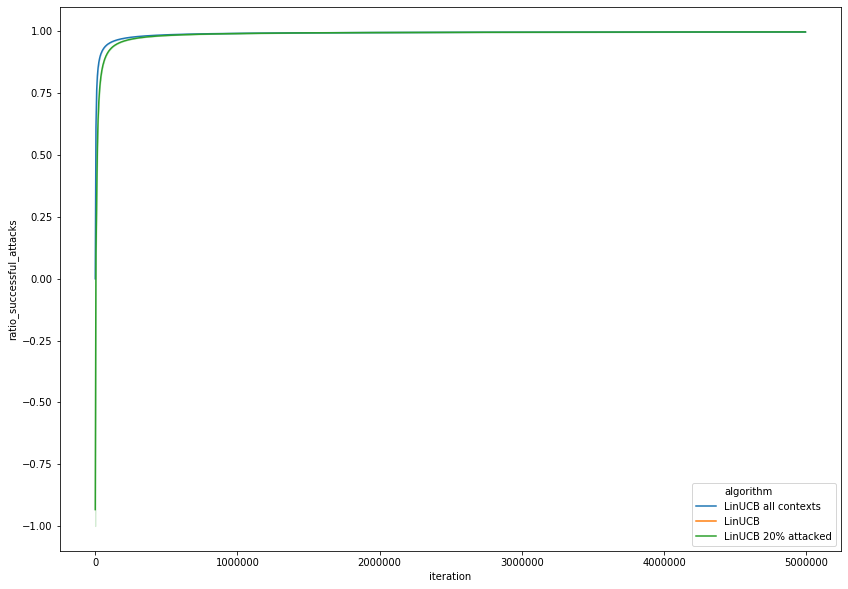

In [50]:
plot_results(all_results_df[all_results_df.attack_frequency > 0], y='ratio_successful_attacks', hue=groupby, frequency=5000, hue_order=['LinUCB all contexts','LinUCB','LinUCB 20% attacked'], title=f'ratio_success_{title_prefix}')

In [30]:
all_results_df[all_results_df.sparse_attacks_factor == -10]

,iteration,regret,cumulative_regret,rewards,norm_errors,attacks,relative_attack_norm,decrease_epsilon,successful_attack,xi,attack_frequency,sum_attacks_norms,weak_attack,method,sparse_attacks_factor,nb_attacks,description
4320000,0,0.020522,0.020522,[0.0072552127212019285],0.671484,0.000000,1.0,True,1.0,0.0001,1.0,0.000000e+00,False,None,-10,0,attack frequency:1.0_sparse_attacks_factor:-10
4320001,100,0.262050,13.402445,[-0.11294817456461802],0.672503,0.000000,1.0,True,1.0,0.0001,1.0,-7.870014e+01,False,None,-10,0,attack frequency:1.0_sparse_attacks_factor:-10
4320002,200,0.079574,24.841810,[0.08701240659023098],0.686871,0.000000,1.0,True,1.0,0.0001,1.0,-1.176660e+02,False,None,-10,0,attack frequency:1.0_sparse_attacks_factor:-10
4320003,300,0.222681,37.969831,[-0.12987301779360538],0.678506,0.000000,1.0,True,1.0,0.0001,1.0,-1.607027e+02,False,None,-10,0,attack frequency:1.0_sparse_attacks_factor:-10
4320004,400,0.311408,49.088618,[-0.14665857110382352],0.685724,0.000000,1.0,True,1.0,0.0001,1.0,-2.783715e+02,False,None,-10,0,attack frequency:1.0_sparse_attacks_factor:-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759995,999500,0.145526,87499.447562,[0.04250036049936949],0.486942,0.000000,1.0,True,1.0,0.0001,1.0,-1.114065e+06,False,None,-10,0,attack frequency:1.0_sparse_attacks_factor:-10
5759996,999600,0.364891,87508.711859,[-0.18332701628570428],0.486943,-24.287807,10.0,True,1.0,0.0001,1.0,-1.114192e+06,False,None,-10,0,attack frequency:1.0_sparse_attacks_factor:-10
5759997,999700,0.097217,87516.610646,[0.05462811719579471],0.486941,0.000000,1.0,True,1.0,0.0001,1.0,-1.114244e+06,False,None,-10,0,attack frequency:1.0_sparse_attacks_factor:-10
5759998,999800,0.020707,87525.025965,[-0.122527416251377],0.486939,0.000000,1.0,True,1.0,0.0001,1.0,-1.114318e+06,False,None,-10,0,attack frequency:1.0_sparse_attacks_factor:-10


In [46]:
all_results_df['sum_attacks_norms'] = all_results_df['sum_attacks_norms'].apply(lambda x: abs(x)if x else x)

In [47]:
all_results_df[all_results_df.sparse_attacks_factor == -10].sum_attacks_norms

4320000    0.000000e+00
4320001    7.870014e+01
4320002    1.176660e+02
4320003    1.607027e+02
4320004    2.783715e+02
               ...     
5759995    1.114065e+06
5759996    1.114192e+06
5759997    1.114244e+06
5759998    1.114318e+06
5759999    1.114388e+06
Name: sum_attacks_norms, Length: 1440000, dtype: float64

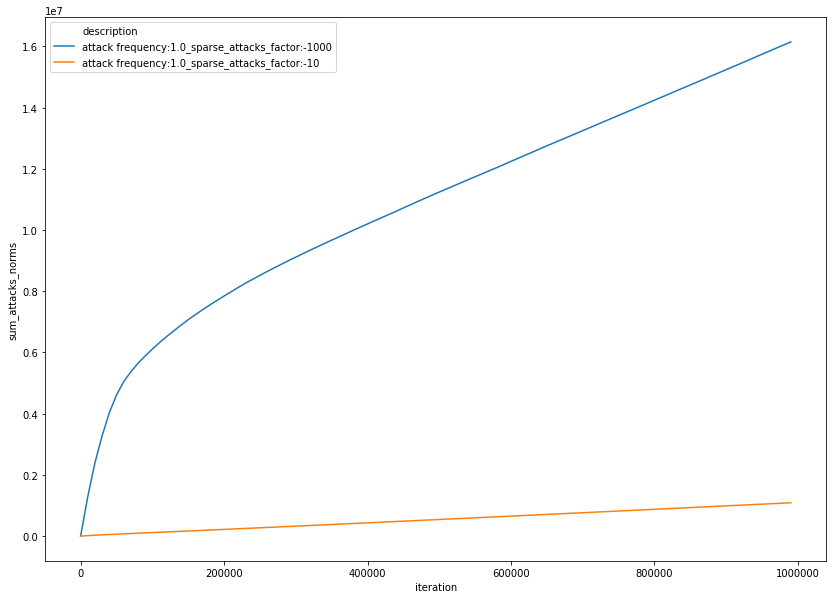

In [56]:
plot_results(all_results_df[(all_results_df.sparse_attacks_factor == -10) | (all_results_df.sparse_attacks_factor == -1000)], y='sum_attacks_norms', hue=groupby, frequency=10000, ci=None)


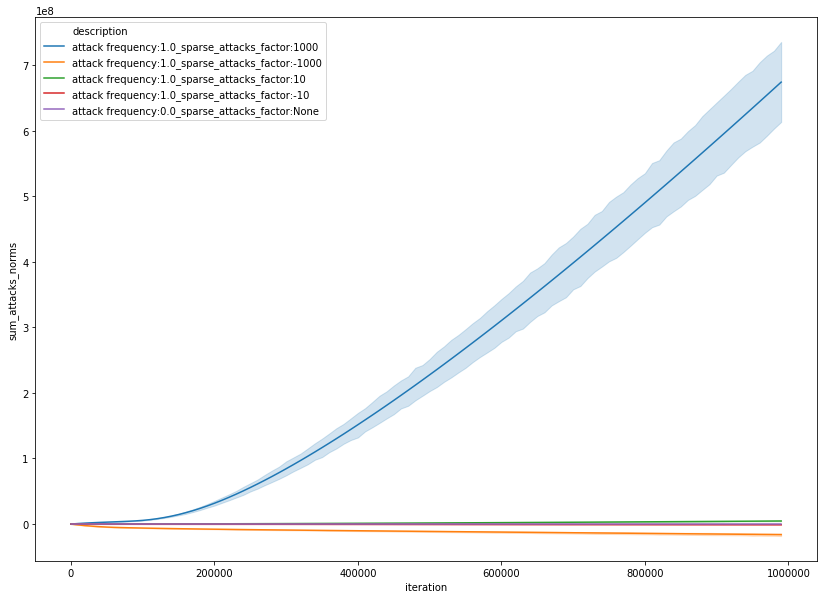

In [16]:
plot_results(all_results_df, y='sum_attacks_norms', hue=groupby, frequency=10000)

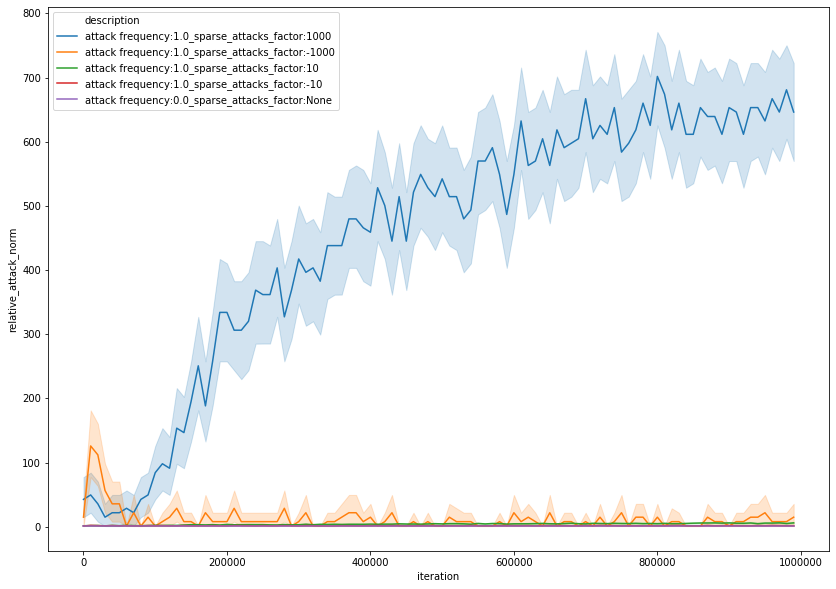

In [17]:
plot_results(all_results_df, y='relative_attack_norm', hue=groupby, frequency=10000)

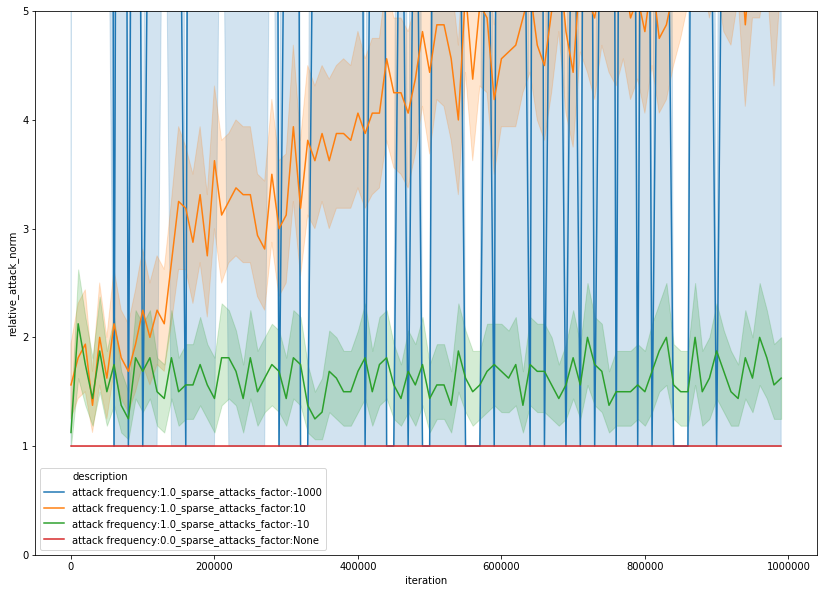

In [24]:
plot_results(all_results_df[(all_results_df.sparse_attacks_factor !=1000) & (all_results_df.sparse_attacks_factor != -1000)], y='relative_attack_norm', hue=groupby, frequency=10000, ylim=[0, 5])

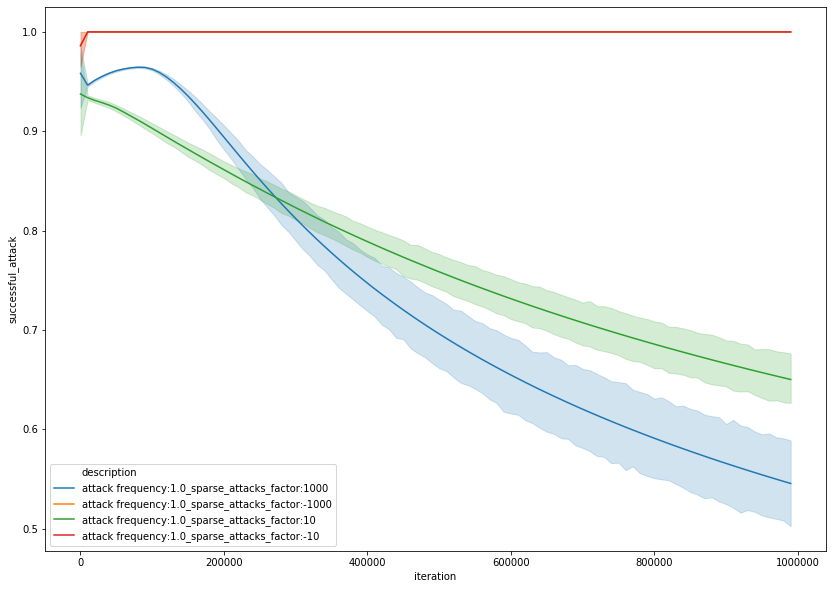

In [18]:
plot_results(all_results_df[all_results_df.attack_frequency > 0], y='successful_attack', hue=groupby, frequency=10000)

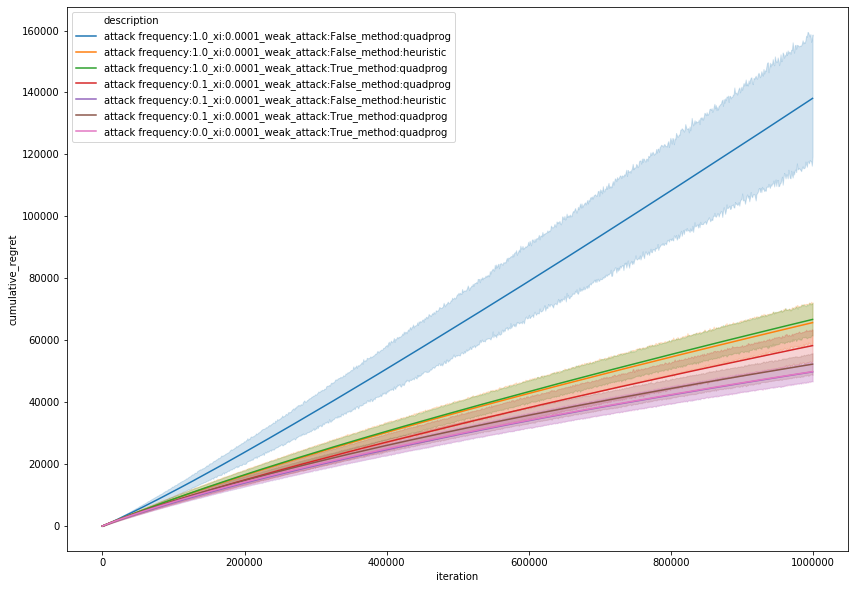

In [35]:
plot_results(all_results_df, y='cumulative_regret', hue=groupby, frequency=1000)

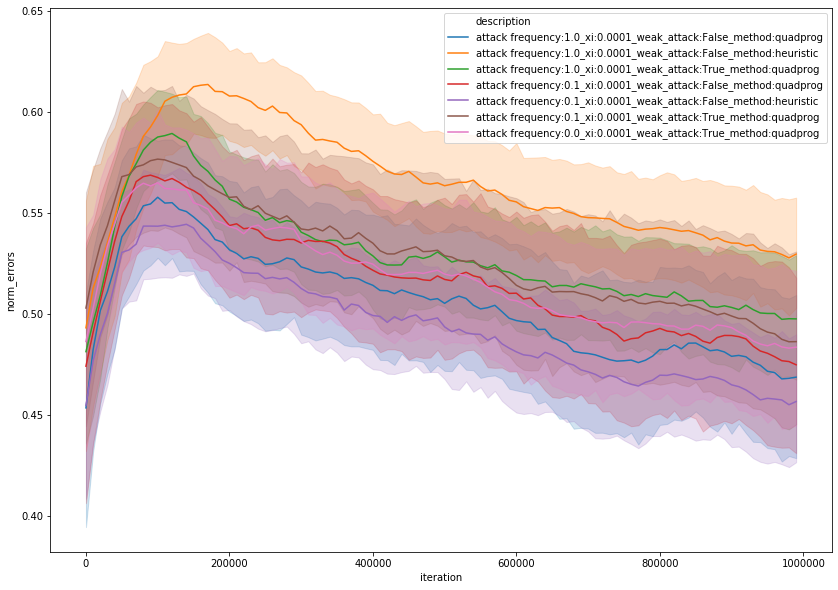

In [41]:
plot_results(all_results_df, y='norm_errors', hue=groupby, frequency=10000)

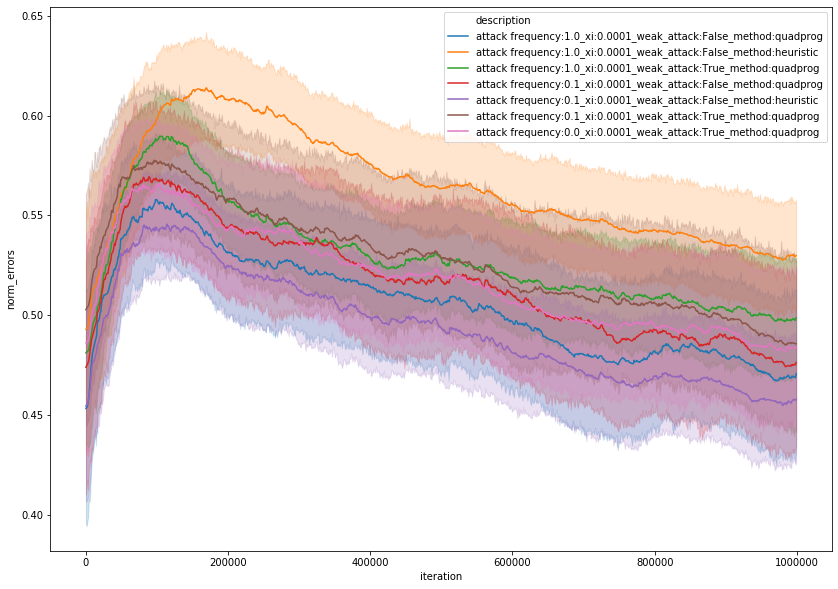

In [42]:
plot_results(all_results_df, y='norm_errors', hue=groupby, frequency=1000)

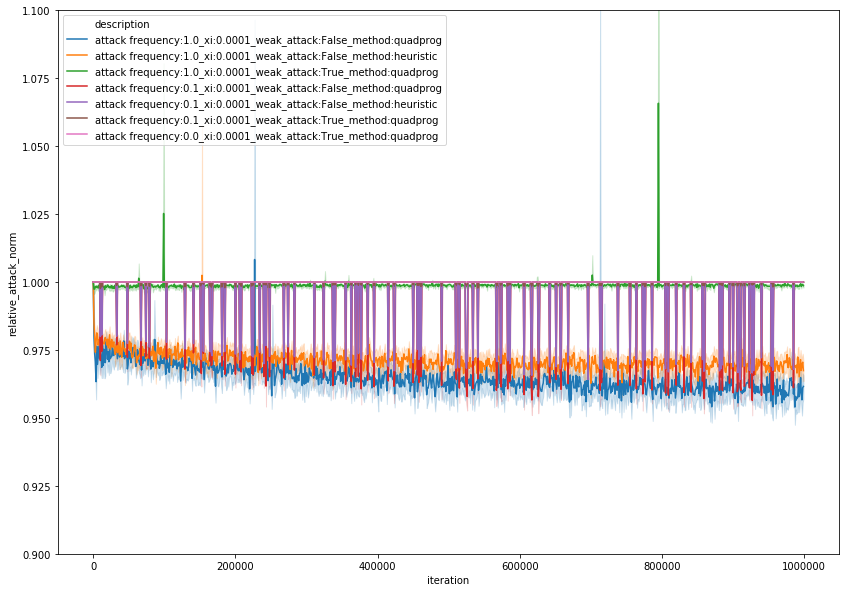

In [37]:
plot_results(all_results_df, y='relative_attack_norm', hue=groupby, ylim=(0.9,1.1))

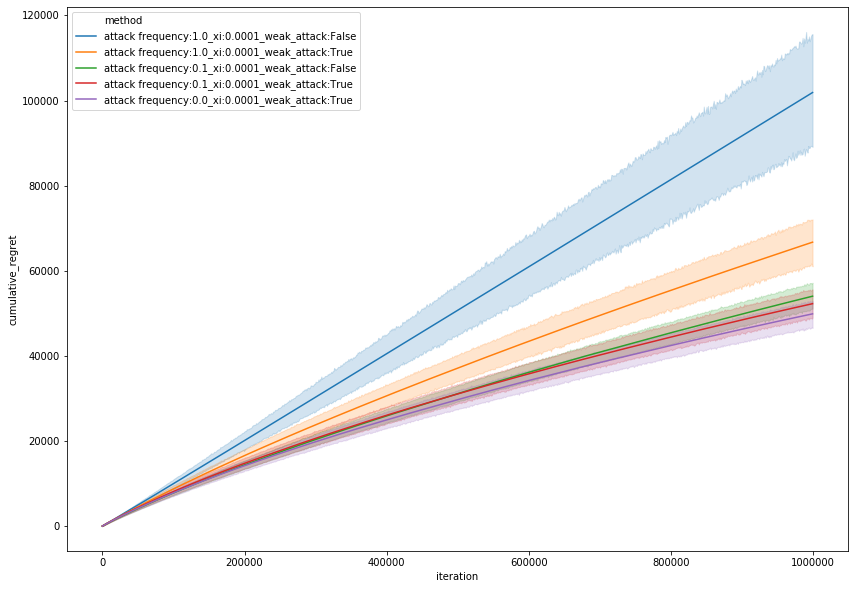

In [12]:
plot_results(all_results_df, y='cumulative_regret', hue=groupby)

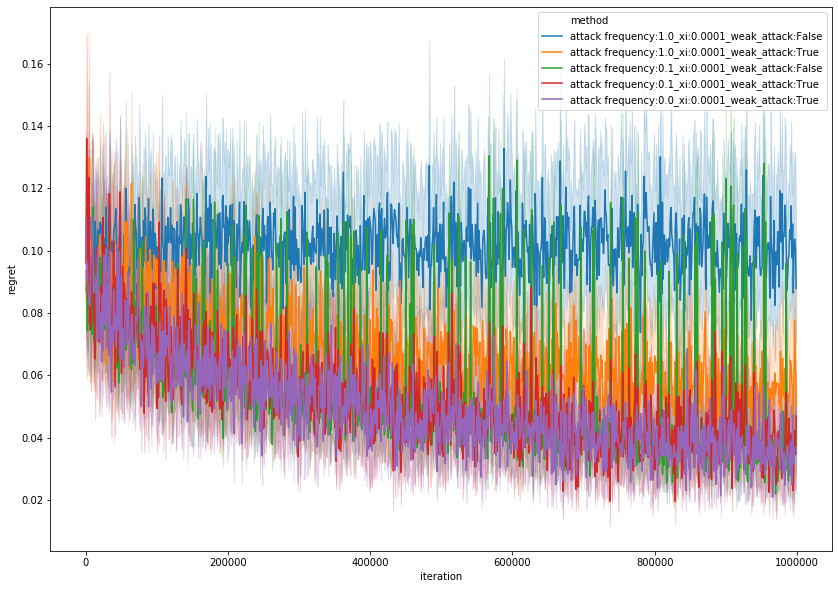

In [13]:
plot_results(all_results_df, y='regret', hue=groupby)

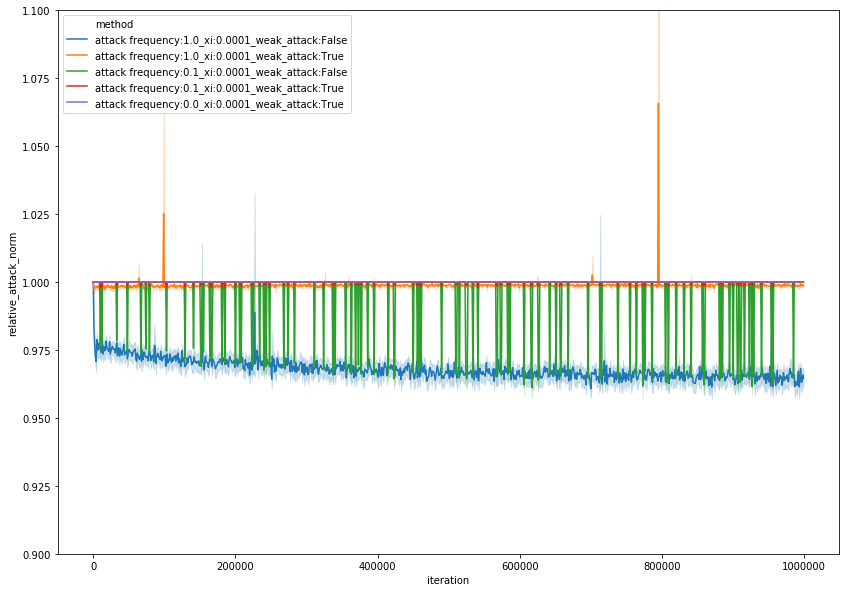

In [14]:
plot_results(all_results_df, y='relative_attack_norm', hue=groupby, ylim=(0.9,1.1))

In [15]:
all_results_df[(all_results_df.attack_frequency == 1.0) & (all_results_df_results_df.weak_attack) & (all_results_df.method)]

,iteration,regret,cumulative_regret,rewards,norm_errors,attacks,relative_attack_norm,decrease_epsilon,successful_attack,xi,attack_frequency,weak_attack,method
0,0,0.009899,0.009899,[0.03892538431720202],0.630833,inf,1.000000,True,1.000000,0.0001,1.0,False,attack frequency:1.0_xi:0.0001_weak_attack:False
1,100,0.103851,10.543257,[-0.0854076187825412],0.630836,0.040153,0.999855,True,0.524752,0.0001,1.0,False,attack frequency:1.0_xi:0.0001_weak_attack:False
2,200,0.185224,23.404147,[-0.021636082200554345],0.631247,inf,1.000000,True,0.621891,0.0001,1.0,False,attack frequency:1.0_xi:0.0001_weak_attack:False
3,300,0.247884,36.246970,[-0.07194928613724205],0.631237,0.159054,0.993607,True,0.714286,0.0001,1.0,False,attack frequency:1.0_xi:0.0001_weak_attack:False
4,400,0.073573,49.054660,[-0.10644735940143871],0.629647,0.111519,0.997688,True,0.775561,0.0001,1.0,False,attack frequency:1.0_xi:0.0001_weak_attack:False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359995,999500,0.022798,36314.034399,[-0.030449833169467238],0.269826,0.000000,1.000000,True,-1.000000,0.0001,0.0,True,attack frequency:0.0_xi:0.0001_weak_attack:True
3359996,999600,0.020502,36316.982914,[-0.0574815908704794],0.269867,0.000000,1.000000,True,-1.000000,0.0001,0.0,True,attack frequency:0.0_xi:0.0001_weak_attack:True
3359997,999700,0.014098,36319.872971,[0.04650046098832286],0.269848,0.000000,1.000000,True,-1.000000,0.0001,0.0,True,attack frequency:0.0_xi:0.0001_weak_attack:True
3359998,999800,0.018695,36322.863962,[0.19281731780060019],0.269838,0.000000,1.000000,True,-1.000000,0.0001,0.0,True,attack frequency:0.0_xi:0.0001_weak_attack:True


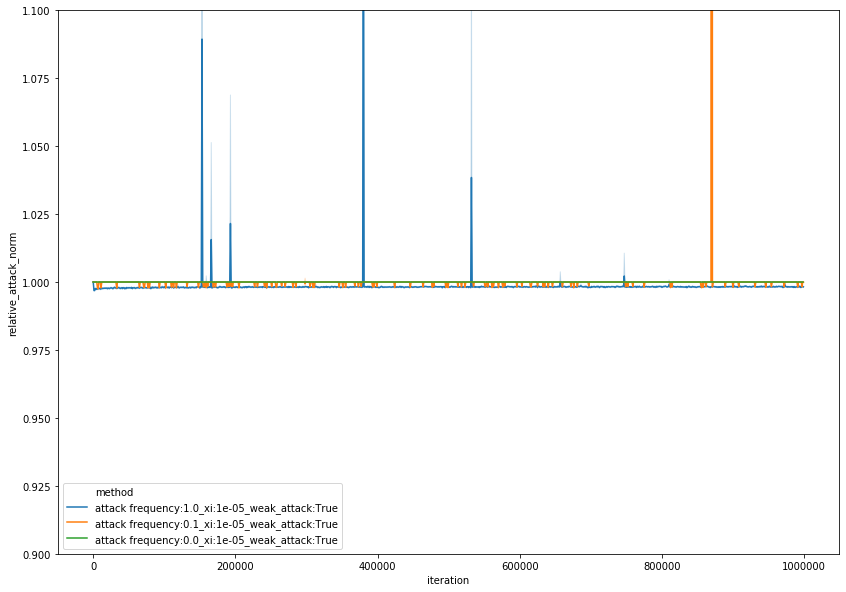

In [29]:
plot_results(df_weak_attacks, y='relative_attack_norm', hue=groupby, ylim=(0.9,1.1))

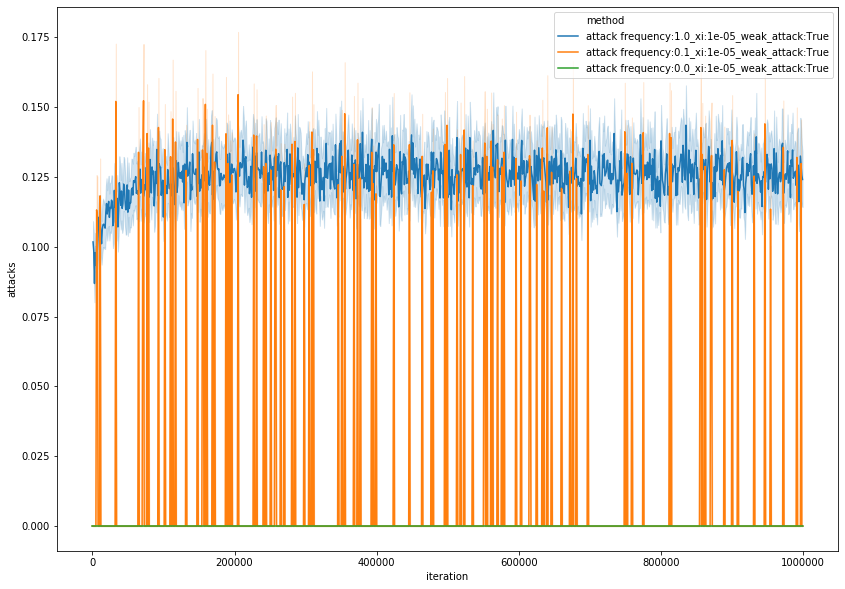

In [32]:
plot_results(df_weak_attacks, y='attacks', hue=groupby)

KeyboardInterrupt: 

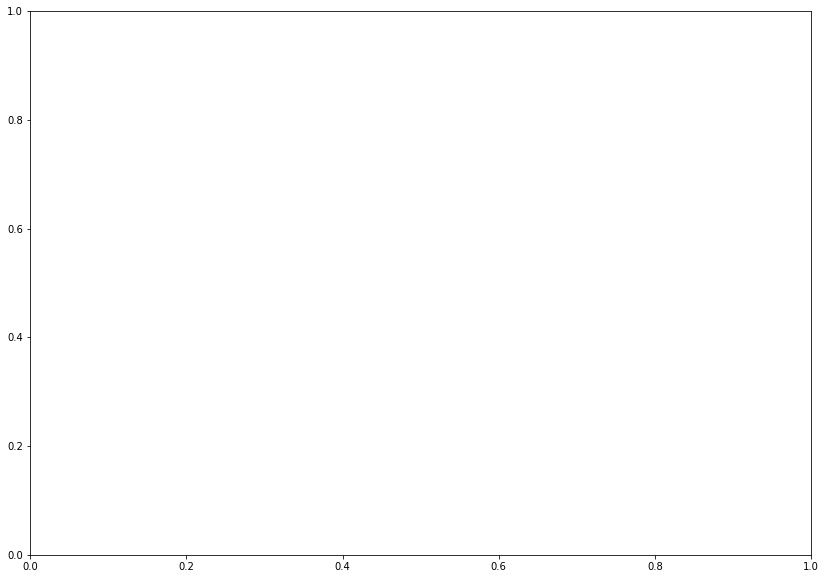

In [10]:
figure_size = (14, 10)
fig, ax = pyplot.subplots(figsize=figure_size)
sns.lineplot(data=all_results_df[all_results_df.iteration % 1000 == 0], x='iteration', y='cum_regret', ci=100, hue='attack_frequency')


In [ ]:
figure_size = (14, 10)
fig, ax = pyplot.subplots(figsize=figure_size)
sns.lineplot(data=all_results_df[all_results_df.iteration % 1000 == 0], x='iteration', y='regret', ci=100, hue='attack_frequency')


In [ ]:
figure_size = (14, 10)
fig, ax = pyplot.subplots(figsize=figure_size)
sns.lineplot(data=all_results_df[all_results_df.iteration % 1000 == 0], x='iteration', y='norm_errors', ci=100, hue='attack_frequency')


In [ ]:
figure_size = (14, 10)
fig, ax = pyplot.subplots(figsize=figure_size)
sns.lineplot(data=all_results_df[all_results_df.iteration % 1000 == 0], x='iteration', y='relative_attack_norm', ci=100, hue='attack_frequency')


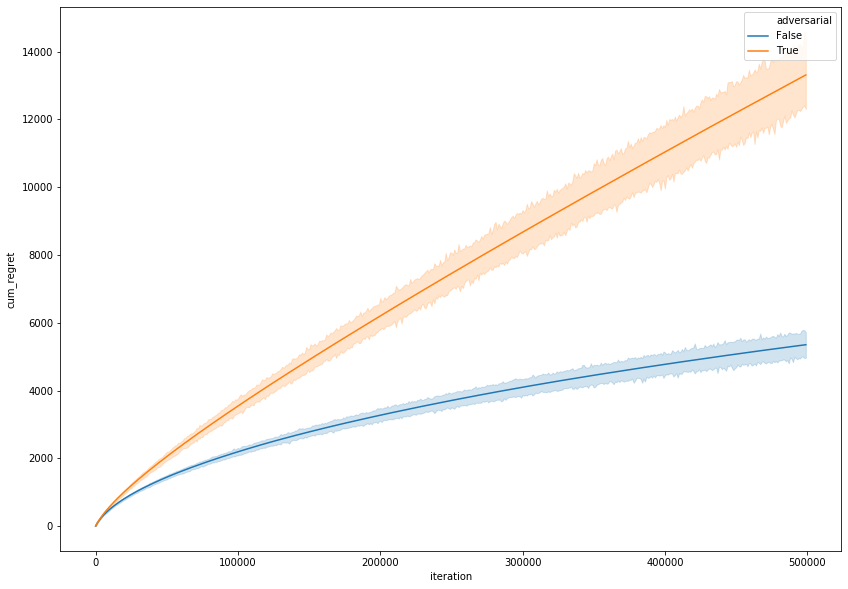

In [153]:
figure_size = (14, 10)
fig, ax = pyplot.subplots(figsize=figure_size)
sns.lineplot(data=all_results_df[all_results_df.iteration % 1000 == 0], x='iteration', y='cum_regret', ci=100, hue='adversarial')


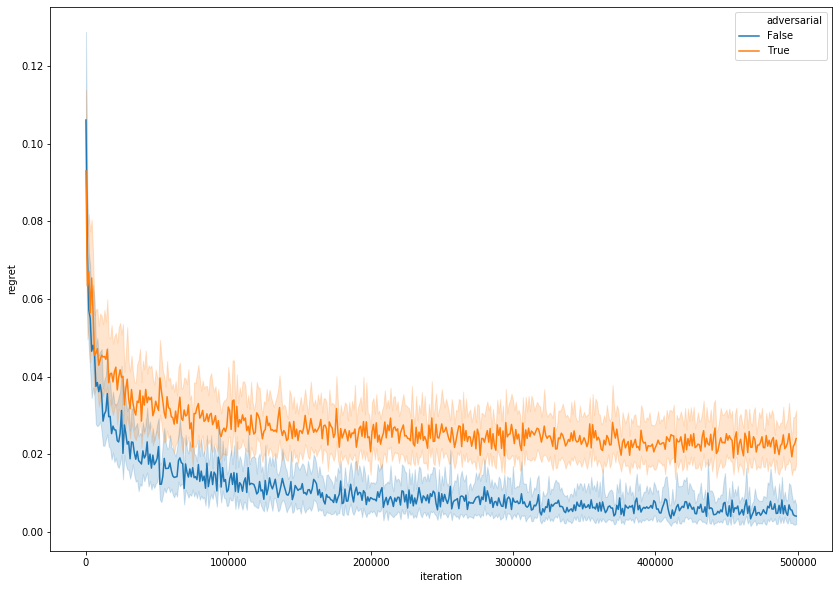

In [157]:
fig, ax = pyplot.subplots(figsize=figure_size)
sns.lineplot(data=all_results_df[all_results_df.iteration % 1000 == 0], x='iteration', y='regret', ci=100, hue='adversarial')

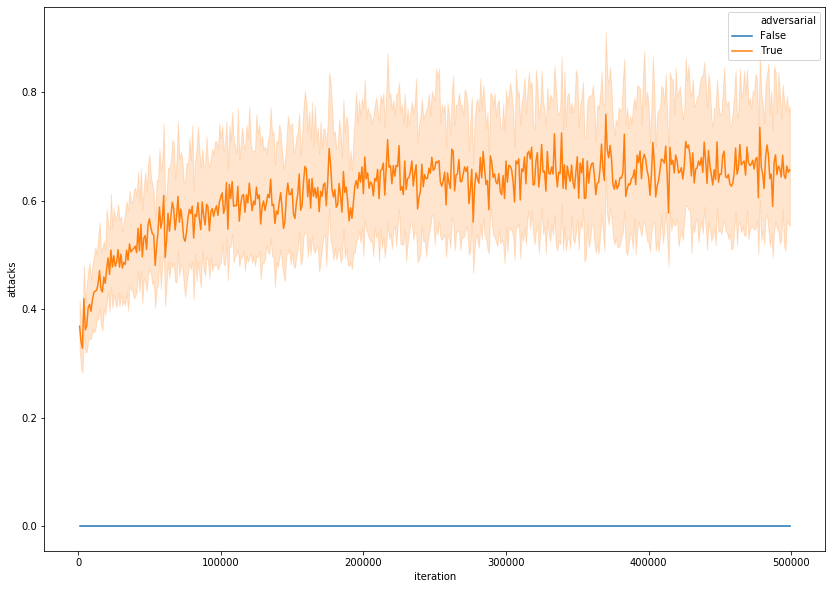

In [164]:
fig, ax = pyplot.subplots(figsize=figure_size)
sns.lineplot(data=all_results_df[(all_results_df.iteration > 100) & (all_results_df.iteration % 1000 == 0)], x='iteration', y='attacks', ci=100, hue='adversarial')


In [49]:
formatted_results = {}
formatted_results[True] = {True:{}, False:{}}
formatted_results[False] = {True:{}, False:{}}
for res in [result[0] for result in results]:
    for key, value in res.items():
        if key in formatted_results[res['adversarial']][res['decrease_epsilon']]:
            formatted_results[res['adversarial']][res['decrease_epsilon']][key].append(value)
        else: 
            formatted_results[res['adversarial']][res['decrease_epsilon']][key] = []

for adversarial in True, False:
    for decrease_epsilon in True, False:
        for k, v in formatted_results[adversarial][decrease_epsilon].items():
            formatted_results[adversarial][decrease_epsilon][k] = np.array(v)

In [52]:
formatted_results[False][False]["regret"]

array([[3.30354566e-04, 8.71658016e-02, 4.10605501e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.22263837e-03, 1.92352706e-01, 1.16476593e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.27158165e-02, 7.18374064e-03, ...,
        0.00000000e+00, 2.77882879e-03, 7.19211235e-02],
       ...,
       [9.43573451e-03, 1.45765460e-01, 1.08085418e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.59435062e-03],
       [2.27053783e-01, 8.21271152e-02, 2.44583070e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.35021718e-02],
       [4.19043530e-02, 2.56812225e-02, 6.65377699e-02, ...,
        3.19210446e-03, 0.00000000e+00, 0.00000000e+00]])

In [69]:
nb_sim, nb_iter = formatted_results[False][False]['regret'].shape

In [66]:
formatted_results[False][False]["regret"][0].mean()

0.015589222260915251

In [75]:
all_results

[          regret  cum_rewards  norm_errors  attacks  adversarial  \
 0       0.598021          0.0     0.777681      0.0        False   
 1       0.016663          0.0     0.777724      0.0        False   
 2       0.120537          0.0     0.777159      0.0        False   
 3       0.360767          0.0     0.777162      0.0        False   
 4       0.043030          0.0     0.768062      0.0        False   
 ...          ...          ...          ...      ...          ...   
 499995  0.000080          0.0     0.074594      0.0        False   
 499996  0.000000          0.0     0.074597      0.0        False   
 499997  0.189658          0.0     0.074595      0.0        False   
 499998  0.000000          0.0     0.074594      0.0        False   
 499999  0.000000          0.0     0.074595      0.0        False   
 
         decrease_epsilon  
 0                  False  
 1                  False  
 2                  False  
 3                  False  
 4                  False  
 .

In [74]:
sns.lineplot(x=np.concatenate([range(nb_iter)for _ in range(nb_sim)]), y=formatted_results[False][False]["regret"][0], ci=None)

ValueError: arrays must all be same length

In [24]:
all_results[['regret', 'cum_rewards', 'norm_errors', 'attacks']] 

,regret,cum_rewards,norm_errors,attacks,adversarial,decrease_epsilon
0,0.598021,0.0,0.777681,0.0,False,False
1,0.016663,0.0,0.777724,0.0,False,False
2,0.120537,0.0,0.777159,0.0,False,False
3,0.360767,0.0,0.777162,0.0,False,False
4,0.043030,0.0,0.768062,0.0,False,False
...,...,...,...,...,...,...
499995,0.000080,0.0,0.074594,0.0,False,False
499996,0.000000,0.0,0.074597,0.0,False,False
499997,0.189658,0.0,0.074595,0.0,False,False
499998,0.000000,0.0,0.074594,0.0,False,False
